<a href="https://colab.research.google.com/github/sutirach1/pm/blob/main/Pm_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sys
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
data_url='https://raw.githubusercontent.com/sutirach1/pm/main/bangkok-air-quality.csv'
data=pd.read_csv(data_url, parse_dates=['date'], na_values=[' '], skipinitialspace=True)
data

,date,pm25,pm10,o3,no2,so2,co
0,2021-10-01,58.0,24.0,11.0,5.0,NaN,NaN
1,2021-10-02,57.0,37.0,23.0,7.0,1.0,NaN
2,2021-10-03,70.0,NaN,NaN,NaN,NaN,NaN
3,2021-09-01,62.0,25.0,12.0,6.0,NaN,NaN
4,2021-09-02,55.0,20.0,6.0,3.0,NaN,NaN
...,...,...,...,...,...,...,...
2822,2015-03-15,NaN,NaN,23.0,13.0,3.0,9.0
2823,2014-11-30,NaN,NaN,40.0,36.0,4.0,11.0
2824,2013-12-31,NaN,NaN,68.0,33.0,3.0,7.0
2825,2014-01-26,NaN,NaN,54.0,53.0,6.0,18.0


In [4]:
data=data.sort_values('date').reset_index(drop=True).copy()
data

,date,pm25,pm10,o3,no2,so2,co
0,2013-12-31,NaN,NaN,68.0,33.0,3.0,7.0
1,2014-01-01,NaN,84.0,90.0,48.0,5.0,16.0
2,2014-01-02,NaN,84.0,119.0,63.0,7.0,14.0
3,2014-01-03,NaN,103.0,95.0,57.0,7.0,13.0
4,2014-01-04,NaN,101.0,52.0,34.0,1.0,NaN
...,...,...,...,...,...,...,...
2822,2021-09-29,98.0,39.0,13.0,9.0,1.0,NaN
2823,2021-09-30,80.0,28.0,8.0,4.0,NaN,NaN
2824,2021-10-01,58.0,24.0,11.0,5.0,NaN,NaN
2825,2021-10-02,57.0,37.0,23.0,7.0,1.0,NaN


In [5]:
y_col='pm25'

In [6]:
data.dropna(subset=[y_col], inplace=True)
data

,date,pm25,pm10,o3,no2,so2,co
938,2016-07-30,61.0,19.0,17.0,15.0,8.0,6.0
939,2016-07-31,68.0,24.0,25.0,13.0,7.0,6.0
940,2016-08-01,60.0,20.0,26.0,14.0,2.0,6.0
941,2016-08-02,68.0,25.0,21.0,14.0,7.0,6.0
942,2016-08-03,70.0,26.0,23.0,16.0,2.0,6.0
...,...,...,...,...,...,...,...
2822,2021-09-29,98.0,39.0,13.0,9.0,1.0,NaN
2823,2021-09-30,80.0,28.0,8.0,4.0,NaN,NaN
2824,2021-10-01,58.0,24.0,11.0,5.0,NaN,NaN
2825,2021-10-02,57.0,37.0,23.0,7.0,1.0,NaN


In [52]:
data['date'].dt.year

938     2016
939     2016
940     2016
941     2016
942     2016
        ... 
2822    2021
2823    2021
2824    2021
2825    2021
2826    2021
Name: date, Length: 1883, dtype: int64

**ค่าเฉลี่ยแต่ละปี**

In [54]:
data.groupby(data['date'].dt.year).mean()['pm25']

date
2016    88.470968
2017    89.570637
2018    87.445055
2019    83.415978
2020    76.978022
2021    73.836957
Name: pm25, dtype: float64

In [24]:
df=data[['date', y_col]]
df.columns=['ds', 'y']
df

,ds,y
938,2016-07-30,61.0
939,2016-07-31,68.0
940,2016-08-01,60.0
941,2016-08-02,68.0
942,2016-08-03,70.0
...,...,...
2822,2021-09-29,98.0
2823,2021-09-30,80.0
2824,2021-10-01,58.0
2825,2021-10-02,57.0


In [8]:
from fbprophet import Prophet

In [44]:
df.nlargest(5, columns='y')

,ds,y
2572,2021-01-22,187.0
1478,2018-01-22,183.0
2195,2020-01-10,180.0
2565,2021-01-15,180.0
1851,2019-01-30,177.0


In [45]:
df.nsmallest(5, columns='y')

,ds,y
2816,2021-09-23,18.0
2818,2021-09-25,19.0
2815,2021-09-22,23.0
2819,2021-09-26,25.0
2448,2020-09-20,26.0


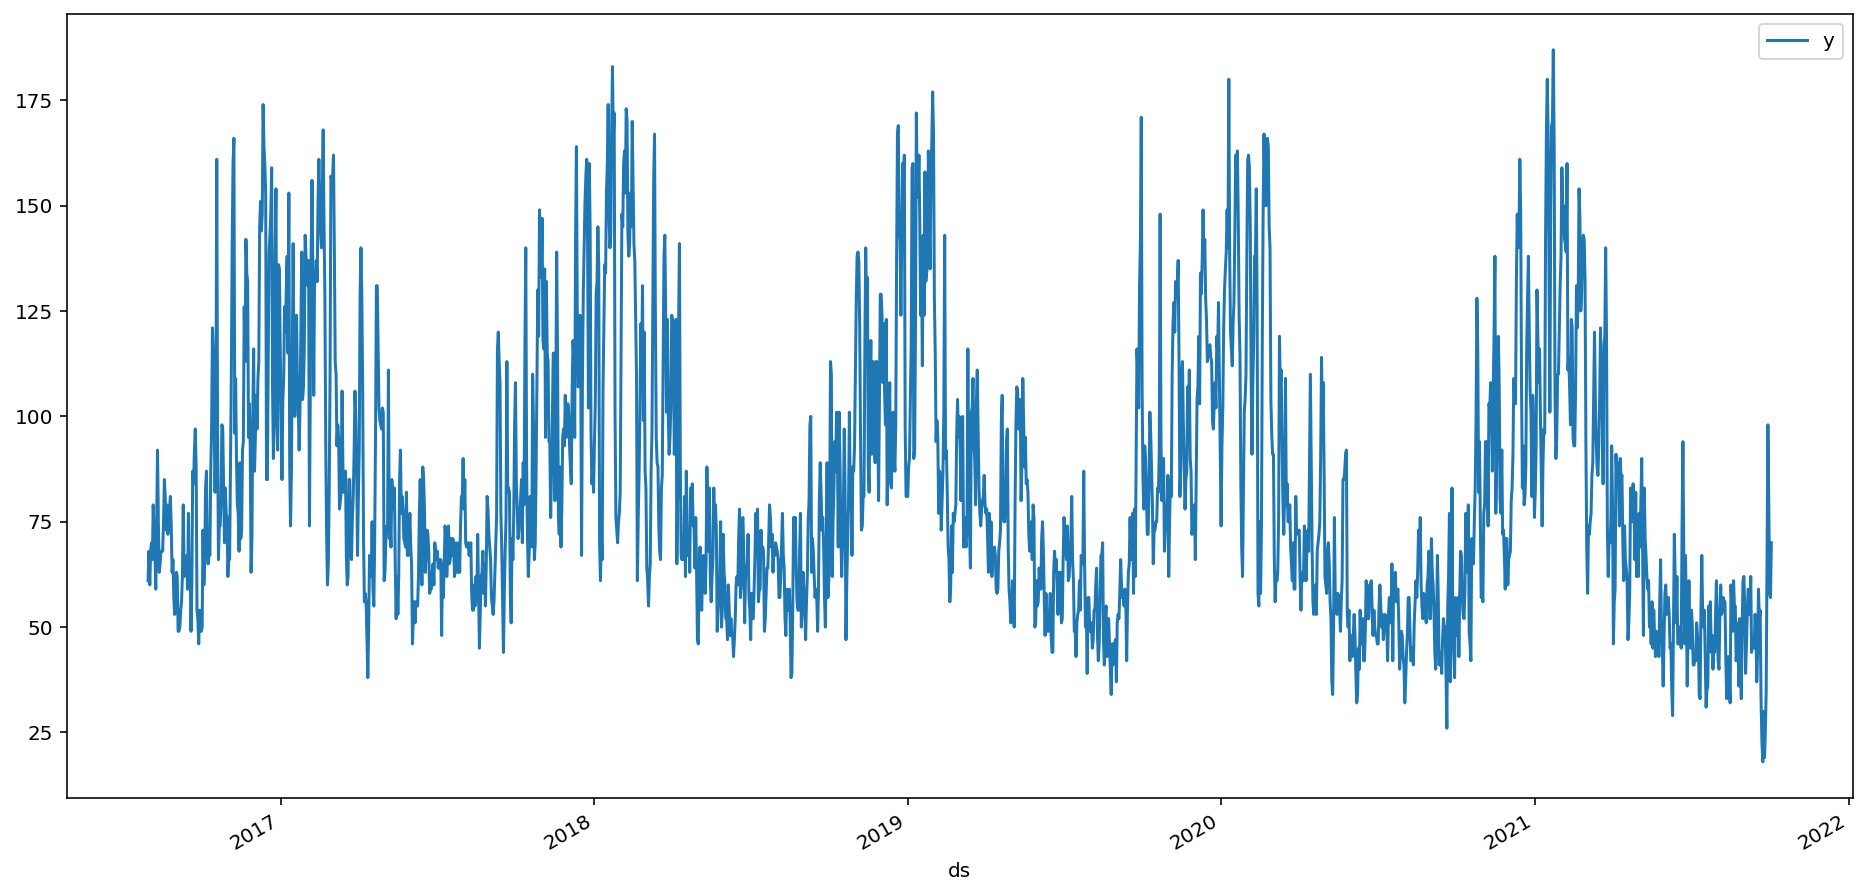

In [25]:
df.set_index('ds').plot(figsize=(16, 8));

In [26]:
model=Prophet()

In [27]:
model.__dict__

{'changepoint_prior_scale': 0.05,
 'changepoint_range': 0.8,
 'changepoints': None,
 'changepoints_t': None,
 'component_modes': None,
 'country_holidays': None,
 'daily_seasonality': 'auto',
 'extra_regressors': OrderedDict(),
 'fit_kwargs': {},
 'growth': 'linear',
 'history': None,
 'history_dates': None,
 'holidays': None,
 'holidays_prior_scale': 10.0,
 'interval_width': 0.8,
 'logistic_floor': False,
 'mcmc_samples': 0,
 'n_changepoints': 25,
 'params': {},
 'seasonalities': OrderedDict(),
 'seasonality_mode': 'additive',
 'seasonality_prior_scale': 10.0,
 'specified_changepoints': False,
 'stan_backend': <fbprophet.models.PyStanBackend at 0x7f1c9bd003d0>,
 'stan_fit': None,
 'start': None,
 't_scale': None,
 'train_component_cols': None,
 'train_holiday_names': None,
 'uncertainty_samples': 1000,
 'weekly_seasonality': 'auto',
 'y_scale': None,
 'yearly_seasonality': 'auto'}

In [28]:
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
df.tail()

,ds,y
2822,2021-09-29,98.0
2823,2021-09-30,80.0
2824,2021-10-01,58.0
2825,2021-10-02,57.0
2826,2021-10-03,70.0


In [30]:
future=model.make_future_dataframe(periods=180, freq='D')
future.tail()

,ds
2058,2022-03-28
2059,2022-03-29
2060,2022-03-30
2061,2022-03-31
2062,2022-04-01


In [31]:
forecast=model.predict(future)

In [32]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-07-30,89.276259,36.040648,90.982283,89.276259,89.276259,-25.194215,-25.194215,-25.194215,-0.043469,-0.043469,-0.043469,-25.150746,-25.150746,-25.150746,0.0,0.0,0.0,64.082044
1,2016-07-31,89.277094,35.974059,87.613792,89.277094,89.277094,-27.095733,-27.095733,-27.095733,-1.656365,-1.656365,-1.656365,-25.439368,-25.439368,-25.439368,0.0,0.0,0.0,62.181361
2,2016-08-01,89.277929,35.744458,89.788014,89.277929,89.277929,-25.612631,-25.612631,-25.612631,0.098488,0.098488,0.098488,-25.711120,-25.711120,-25.711120,0.0,0.0,0.0,63.665297
3,2016-08-02,89.278763,38.110482,89.107920,89.278763,89.278763,-24.714459,-24.714459,-24.714459,1.243613,1.243613,1.243613,-25.958072,-25.958072,-25.958072,0.0,0.0,0.0,64.564304
4,2016-08-03,89.279598,37.337836,90.618755,89.279598,89.279598,-24.846702,-24.846702,-24.846702,1.326446,1.326446,1.326446,-26.173149,-26.173149,-26.173149,0.0,0.0,0.0,64.432896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058,2022-03-28,73.118281,51.604035,101.990499,73.000019,73.223085,2.715131,2.715131,2.715131,0.098488,0.098488,0.098488,2.616642,2.616642,2.616642,0.0,0.0,0.0,75.833412
2059,2022-03-29,73.107983,49.690951,102.227981,72.988503,73.213991,3.682002,3.682002,3.682002,1.243613,1.243613,1.243613,2.438390,2.438390,2.438390,0.0,0.0,0.0,76.789986
2060,2022-03-30,73.097686,50.744749,104.567550,72.977757,73.204699,3.526925,3.526925,3.526925,1.326446,1.326446,1.326446,2.200479,2.200479,2.200479,0.0,0.0,0.0,76.624611
2061,2022-03-31,73.087388,49.096962,100.837668,72.966777,73.195237,1.678231,1.678231,1.678231,-0.216343,-0.216343,-0.216343,1.894574,1.894574,1.894574,0.0,0.0,0.0,74.765619


In [33]:
df


,ds,y
938,2016-07-30,61.0
939,2016-07-31,68.0
940,2016-08-01,60.0
941,2016-08-02,68.0
942,2016-08-03,70.0
...,...,...
2822,2021-09-29,98.0
2823,2021-09-30,80.0
2824,2021-10-01,58.0
2825,2021-10-02,57.0


In [34]:
dfcst=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
dfcst

,ds,yhat,yhat_lower,yhat_upper
0,2016-07-30,64.082044,36.040648,90.982283
1,2016-07-31,62.181361,35.974059,87.613792
2,2016-08-01,63.665297,35.744458,89.788014
3,2016-08-02,64.564304,38.110482,89.107920
4,2016-08-03,64.432896,37.337836,90.618755
...,...,...,...,...
2058,2022-03-28,75.833412,51.604035,101.990499
2059,2022-03-29,76.789986,49.690951,102.227981
2060,2022-03-30,76.624611,50.744749,104.567550
2061,2022-03-31,74.765619,49.096962,100.837668


In [35]:
dt=pd.merge(df, dfcst, left_on='ds', right_on='ds')
dt

,ds,y,yhat,yhat_lower,yhat_upper
0,2016-07-30,61.0,64.082044,36.040648,90.982283
1,2016-07-31,68.0,62.181361,35.974059,87.613792
2,2016-08-01,60.0,63.665297,35.744458,89.788014
3,2016-08-02,68.0,64.564304,38.110482,89.107920
4,2016-08-03,70.0,64.432896,37.337836,90.618755
...,...,...,...,...,...
1878,2021-09-29,98.0,65.870059,39.083713,89.928567
1879,2021-09-30,80.0,64.731770,38.300742,91.951325
1880,2021-10-01,58.0,64.514955,37.349658,90.184442
1881,2021-10-02,57.0,65.463757,39.847217,92.563894


In [36]:
dt.shape

(1883, 5)

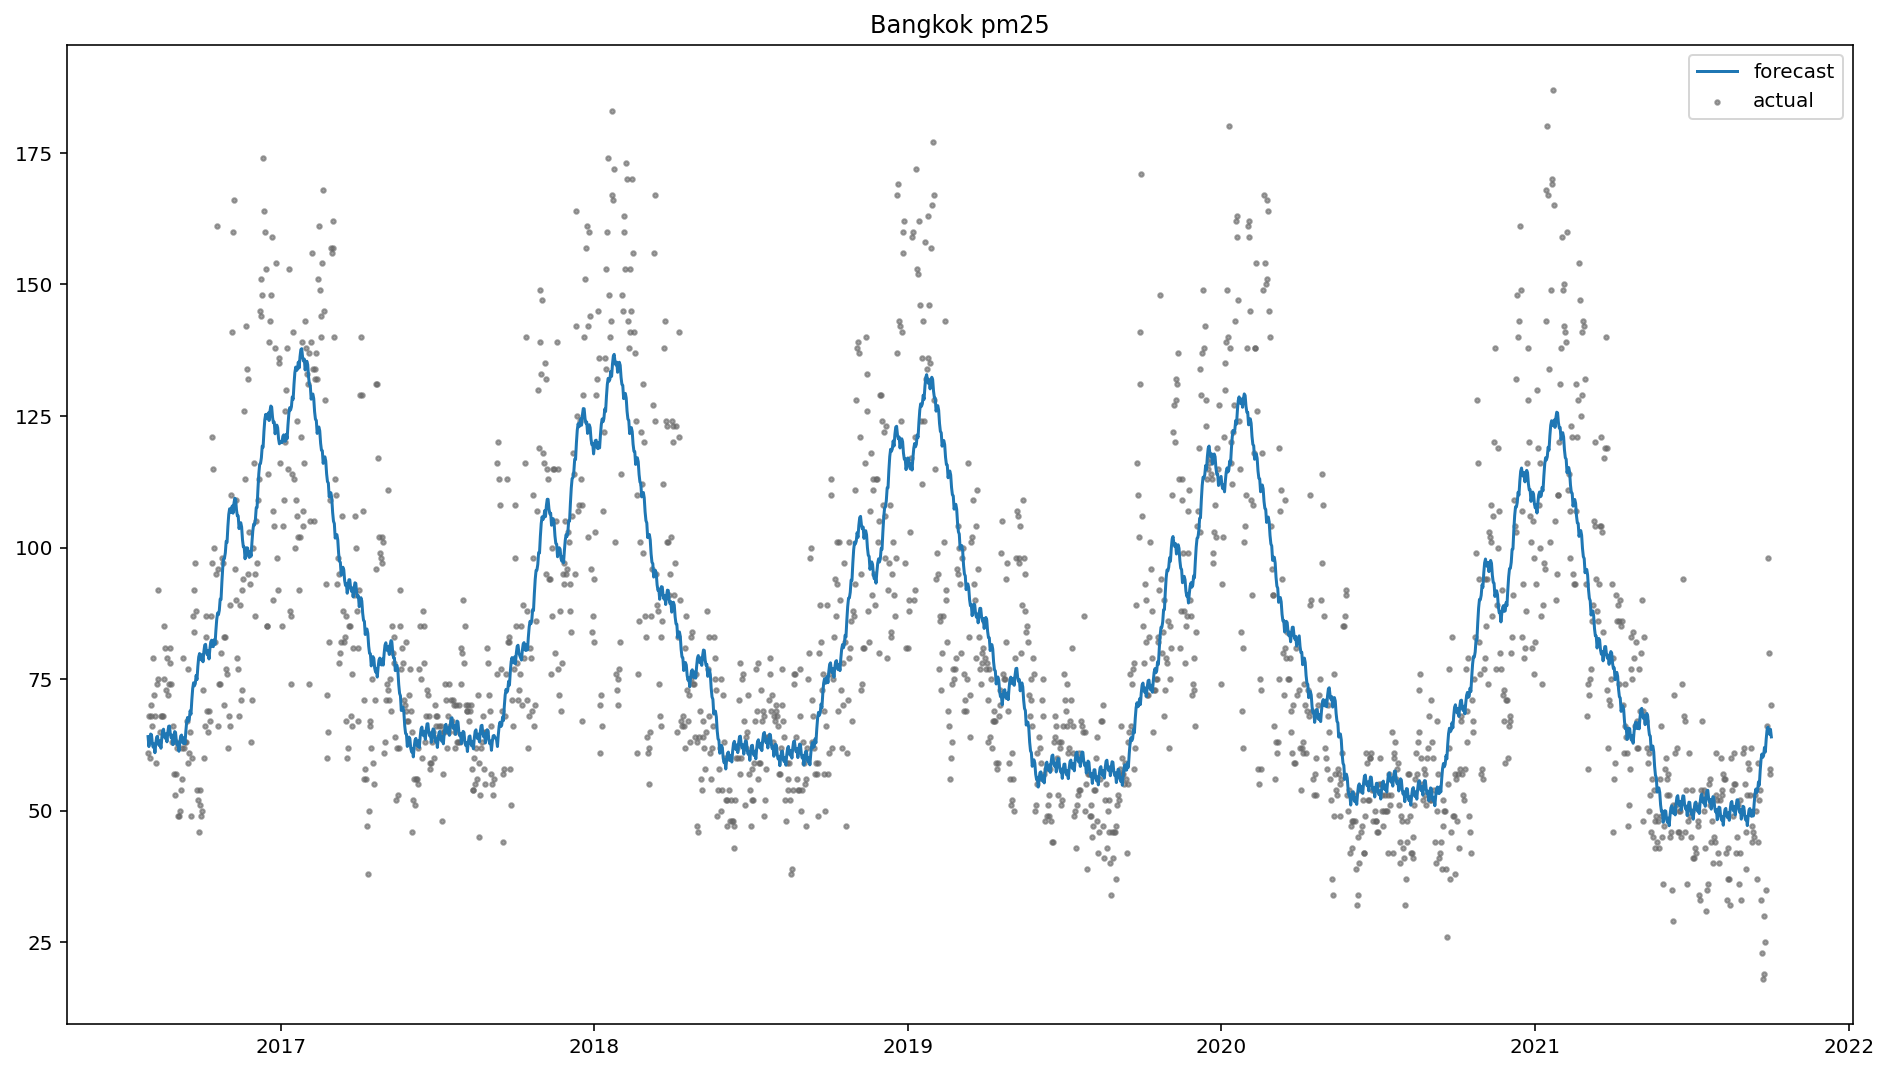

In [37]:
plt.figure(figsize=(16,9))
plt.scatter(dt['ds'], dt['y'], color='.4', label='actual', s=5, alpha=.6)
plt.plot(dt['ds'], dt['yhat'], label='forecast')
plt.title(f'Bangkok {y_col}')
plt.legend();

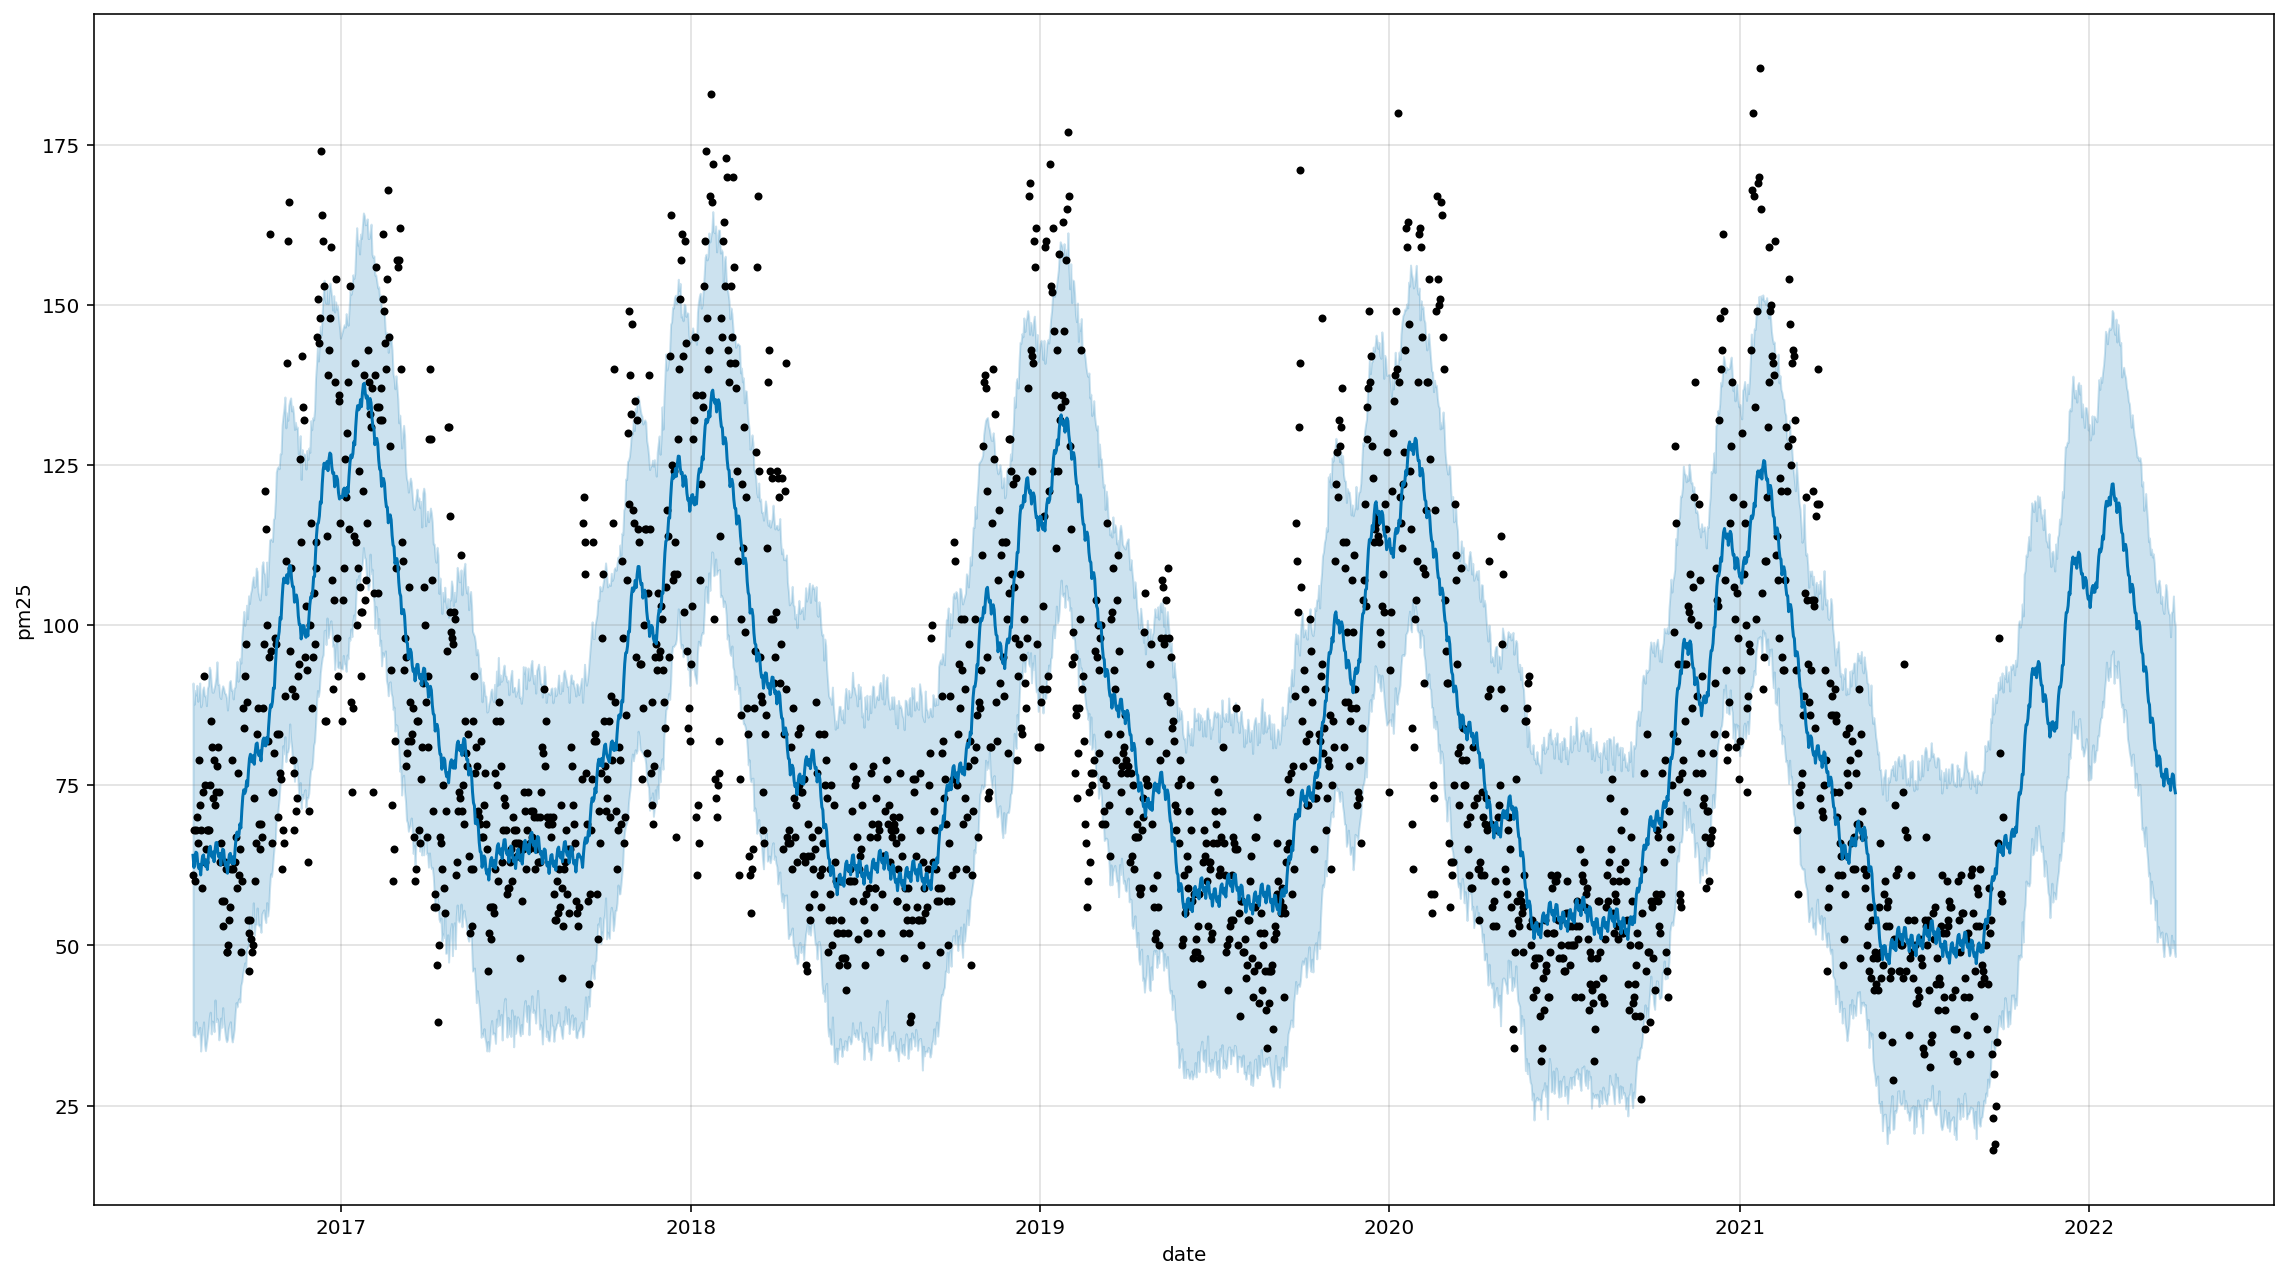

In [38]:
fig=model.plot(forecast, uncertainty=True, figsize=(16, 9), xlabel='date', ylabel=y_col)

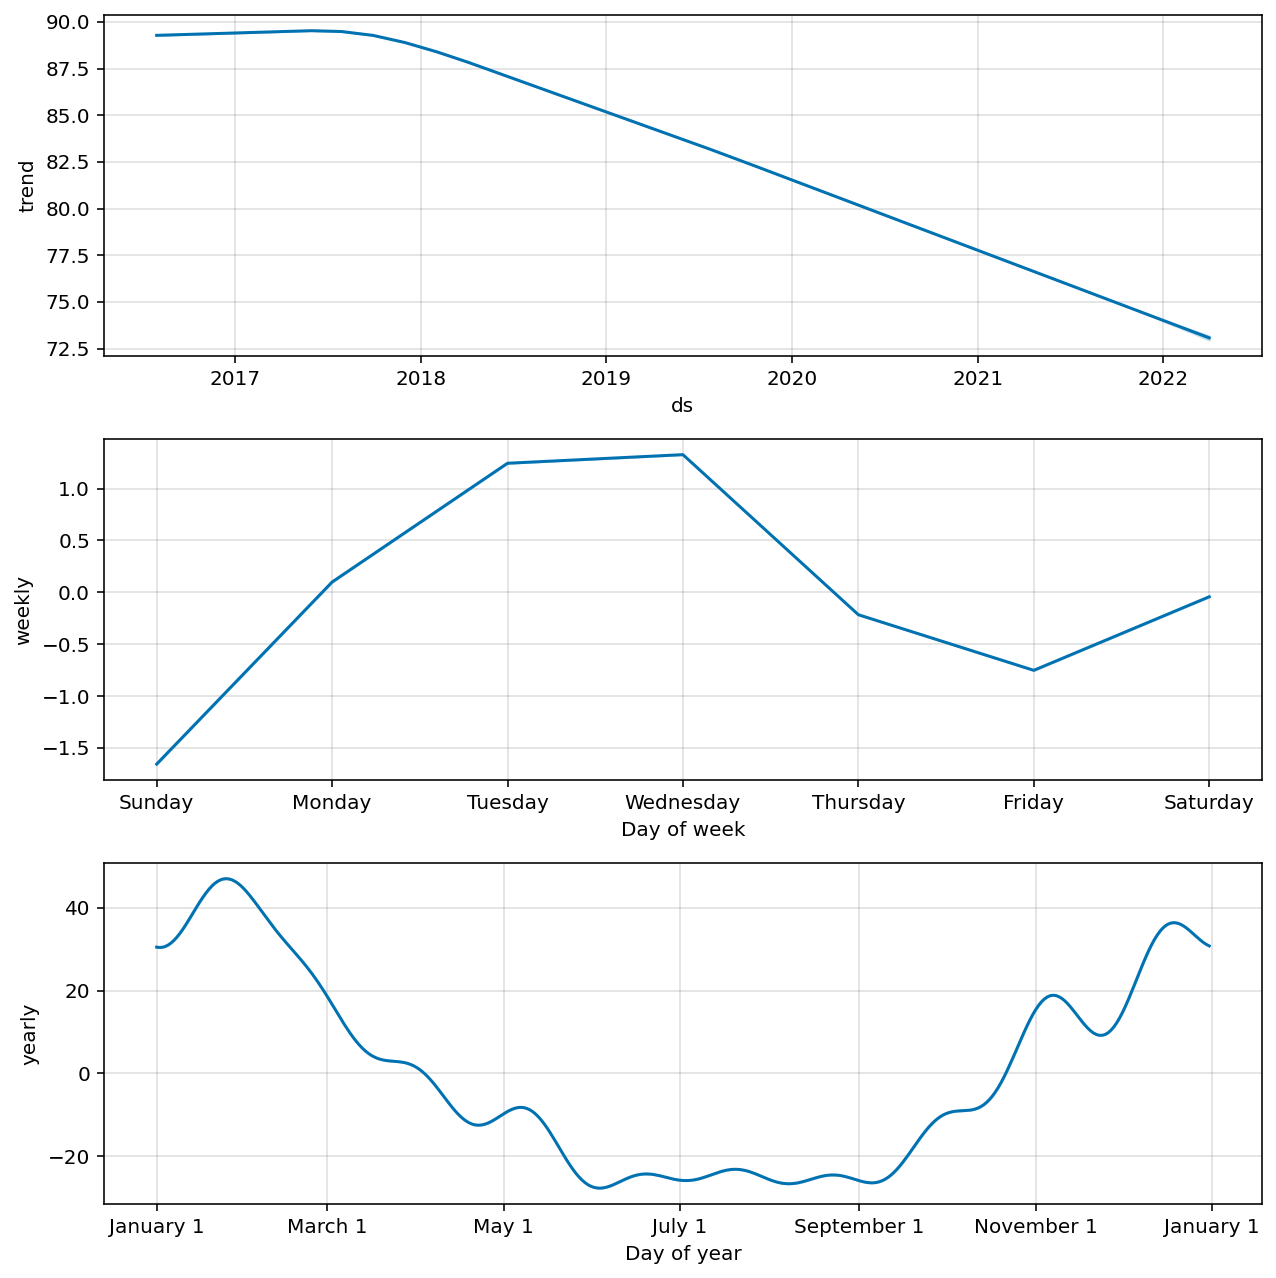

In [39]:
fig=model.plot_components(forecast)

In [40]:
df

,ds,y
938,2016-07-30,61.0
939,2016-07-31,68.0
940,2016-08-01,60.0
941,2016-08-02,68.0
942,2016-08-03,70.0
...,...,...
2822,2021-09-29,98.0
2823,2021-09-30,80.0
2824,2021-10-01,58.0
2825,2021-10-02,57.0
